PCA Implementation

In [7]:
!chmod +x ./pcadata_colab.exe


Covariance matrix : 
[[ 1.         -0.02714515  0.05581884 -0.08430219 -0.15886771 -0.1597852
   0.01059422  0.01366368  0.29001823  0.05390578]
 [-0.02714515  1.          0.00163628 -0.06939591 -0.08831744  0.03097053
  -0.08413405  0.30883396 -0.05127145  0.07967395]
 [ 0.05581884  0.00163628  1.          0.05729565  0.12604323  0.11974156
   0.0234665  -0.06224445 -0.02655278 -0.11337283]
 [-0.08430219 -0.06939591  0.05729565  1.         -0.05439951 -0.10324471
  -0.01752781 -0.08710491  0.00408966  0.10295367]
 [-0.15886771 -0.08831744  0.12604323 -0.05439951  1.          0.14717018
   0.05160873  0.02514623 -0.081786   -0.00708543]
 [-0.1597852   0.03097053  0.11974156 -0.10324471  0.14717018  1.
  -0.06693634  0.04931605 -0.16968876 -0.03365549]
 [ 0.01059422 -0.08413405  0.0234665  -0.01752781  0.05160873 -0.06693634
   1.          0.12259867 -0.04733496 -0.01375661]
 [ 0.01366368  0.30883396 -0.06224445 -0.08710491  0.02514623  0.04931605
   0.12259867  1.         -0.03553398  

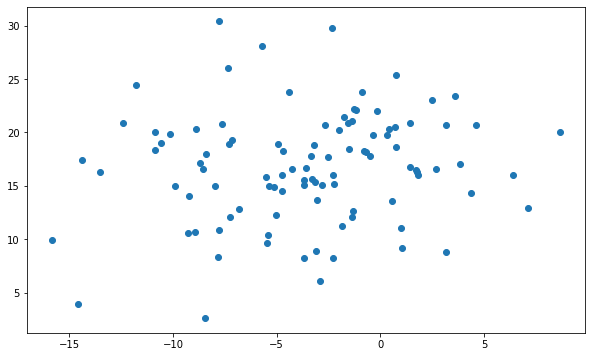

In [8]:

import subprocess

import numpy as np
from matplotlib import pyplot as plt


# Process data to convert string data into a 100x10 matrix
def process_data():
    data = subprocess.run(["./pcadata_colab.exe", "23333"], stdout=subprocess.PIPE).stdout.decode("utf-8")
    data = data.replace("[", "").replace("]", "")
    data = data.replace('\n', ',')
    data = data.split(',')
    data.pop()  # Because we get an empty character at the end of the array after performing splitting
    data = np.array(data, dtype='float64')
    data = data.reshape(100, 10)
    return data


def find_covariance_matrix(data):
    data_mean = data - np.mean(data, axis=0)  # Standardization
    data = data_mean / np.std(data_mean, axis=0)
    C = (data.T @ data) / data.shape[0]
    return C


def find_eigen_vs(data, cov_m):
    w, V = np.linalg.eig(cov_m)
    trans_data = data @ V.T  # Transforming data
    return w, V, trans_data


if __name__ == "__main__":
    data = process_data()
    cov_m = find_covariance_matrix(data)
    eig_val, eig_vec, transf_data = find_eigen_vs(data, cov_m)
    print("Covariance matrix : ")
    print(cov_m)
    print("Top two eigen values are : ")
    print(eig_val[0:2])
    print("Top two eigen vectors are :")
    print(eig_vec[0:2])
    print("TRANSFORMED DATA _________")
    print(transf_data[:, [0, 1]])
    print("Plotting Data ")
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.scatter(transf_data[:, 0], transf_data[:, 1])